# PROMPTS 

*Act as a **data-scientist** mentor from now you are my teacher. We are going to use latest versions of what we use. I have a dataset from kaggle which about Titanic disaster. We are going to use **Pandas-Matplotlib-Seaborn-Sklearn** etc. First we are going to visualize some data and after that we are going to clean up and feature the data and final we are going to make a model to predict if the passenger is survived or not. We make it step by step and i'll give everything about data. If you understand please say yes.*

*Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
So that is my dataset info keep in your mind. If you understand say yes.*

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read the CSV files into Pandas DataFrames
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

*Now we'll look at our data. I want to know datatypes, if there is a null or non values.*

In [41]:
# Display information about the training dataset
print("Training Dataset Info:")
print(train_df.info())
print("\n")

# Display information about the test dataset
print("Test Dataset Info:")
print(test_df.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P

*I gave GPT that result. And this is the feedback. 
Thank you for providing the dataset information. Based on the information provided:*

*In the training dataset, there are missing values in the "Age", "Cabin", and "Embarked" columns.
In the test dataset, there are missing values in the "Age", "Fare", and "Cabin" columns.
We need to handle these missing values before proceeding with further analysis or modeling. There are several ways to handle missing values, such as imputation (filling in missing values with a calculated value) or removing rows or columns with missing values. We'll address this next. Do you have a preference for how we handle missing values?*

I want to fill "age" and "fare" with mean values. But for cabin we have object datatype and i have no idea what to do with it.

In [42]:
# Fill missing values in the "Age" and "Fare" columns with their respective means
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

# Encode the presence of a cabin as a binary indicator (1 for having a cabin, 0 for not having a cabin)
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [43]:

print("Training Dataset Info after handling missing values:")
print(train_df.info())
print("\n")

print("Test Dataset Info after handling missing values:")
print(test_df.info())

Training Dataset Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None


Test Dataset Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Cou

In [44]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


*Before we drop out some unnecessary columns for our model. Let's visualize some data. I want to see a relationship between "sex" "age" and "survived".*

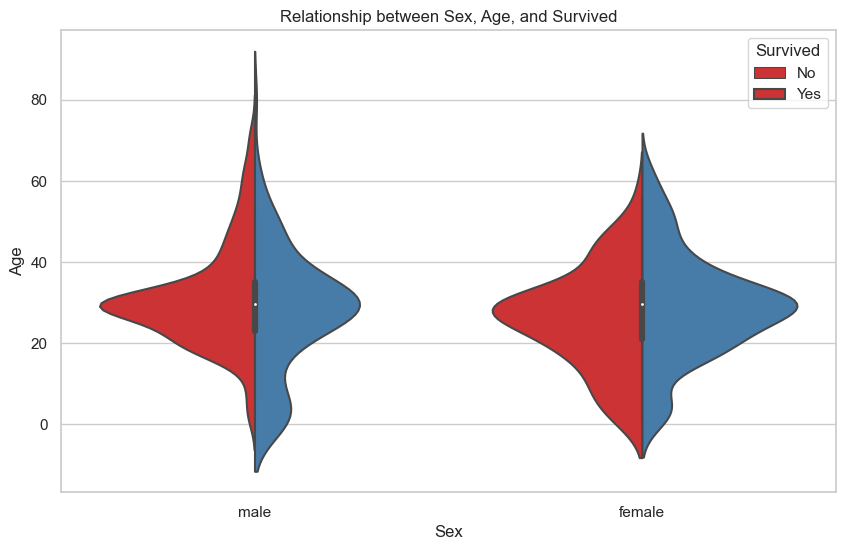

In [45]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x="Sex", y="Age", hue="Survived", split=True, palette="Set1")
plt.title("Relationship between Sex, Age, and Survived")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title="Survived", loc="upper right", labels=["No", "Yes"])
plt.show()

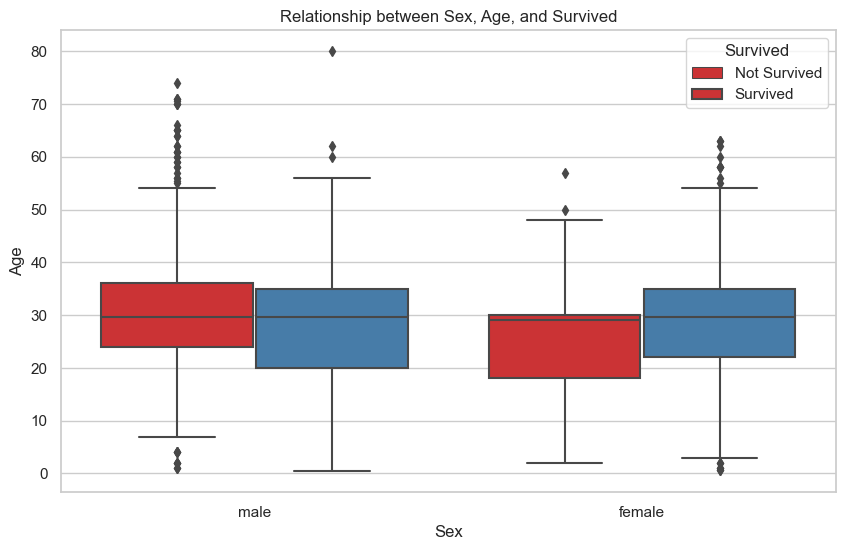

In [46]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x="Sex", y="Age", hue="Survived", palette="Set1")
plt.title("Relationship between Sex, Age, and Survived")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title="Survived", loc="upper right", labels=["Not Survived", "Survived"])
plt.show()

C:\Users\MrOmu\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MrOmu\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MrOmu\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


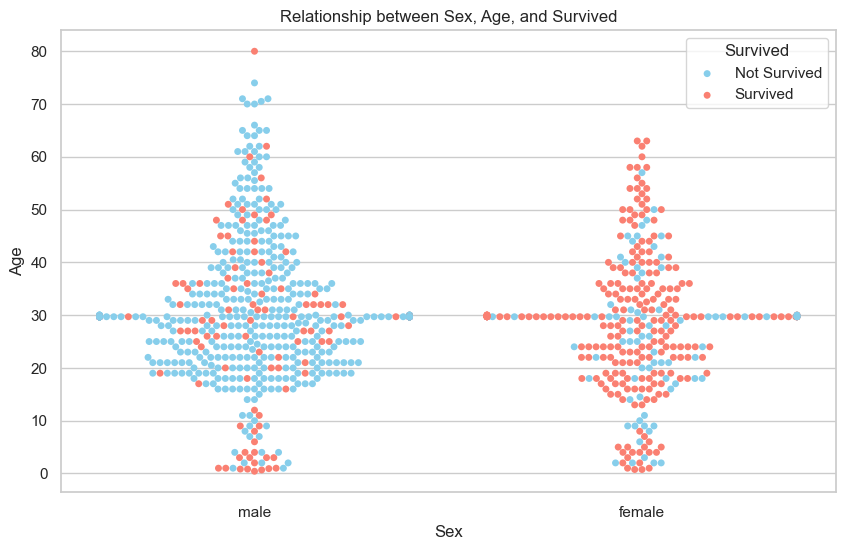

In [47]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=train_df, x="Sex", y="Age", hue="Survived", palette={0: "skyblue", 1: "salmon"})
plt.title("Relationship between Sex, Age, and Survived")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title="Survived", loc="upper right", labels=["Not Survived", "Survived"])
plt.show()

C:\Users\MrOmu\AppData\Local\Temp\ipykernel_13416\3973998332.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=train_df, x="Survived", y="Fare", palette="Set1")
C:\Users\MrOmu\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MrOmu\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MrOmu\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MrOmu\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.9% of the points cannot be plac

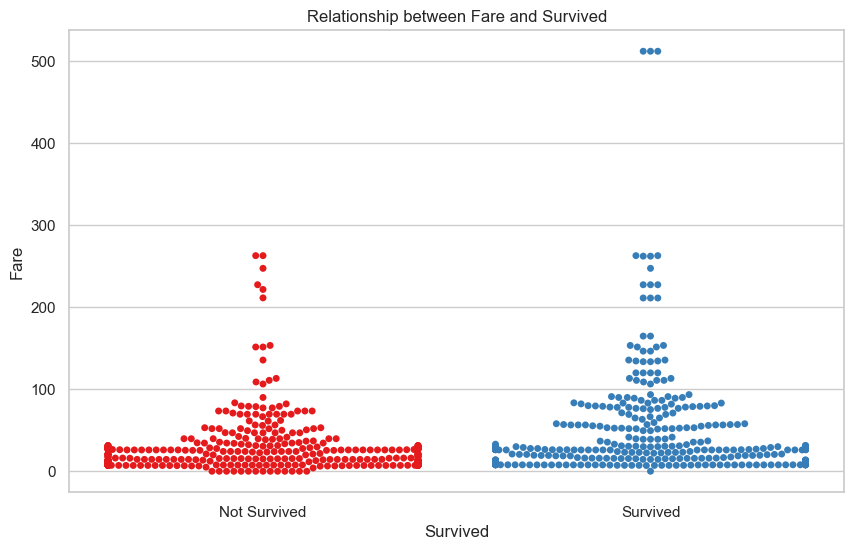

In [48]:
# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=train_df, x="Survived", y="Fare", palette="Set1")
plt.title("Relationship between Fare and Survived")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()

In [49]:
train_df = pd.get_dummies(train_df, columns=["Embarked"], prefix="Embarked")
test_df = pd.get_dummies(test_df, columns=["Embarked"], prefix="Embarked")

In [50]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,1,0,0


*Which columns we are better to drop for our model. Our model will predict if the passenger survived or not. But some columns are unnecessary i think "Name" "Fare" maybe "Ticket" column. What do you think.*

*Name: While the names themselves might not directly affect survival, we could extract titles (e.g., Mr., Mrs., etc.) from the names, which might provide some additional information about the passengers' socio-economic status or other factors that could influence survival.*

*Fare: The fare paid by a passenger might correlate with their socio-economic status, which could potentially influence their chances of survival. However, since we have the "Pclass" column, which already represents the socio-economic status to some extent, keeping the "Fare" column may not be necessary.*

*Ticket: The ticket number itself might not provide much useful information, but patterns within the ticket numbers (e.g., ticket prefix or ticket class) could potentially be relevant.*

In [51]:
# Drop unnecessary columns
columns_to_drop = ["Name", "Fare", "Ticket"]
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)


*Now we have gender column which has 2 values. Female and Male. I want to make it 0 and 1*


In [52]:
# Map values in the "Sex" column to numerical values
sex_mapping = {"female": 0, "male": 1}
train_df["Sex"] = train_df["Sex"].map(sex_mapping)
test_df["Sex"] = test_df["Sex"].map(sex_mapping)

In [53]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Cabin        891 non-null    int64  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
dtypes: float64(1), int64(7), uint8(3)
memory usage: 58.4 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,0,0,0,1
1,2,1,1,0,38.0,1,0,1,1,0,0
2,3,1,3,0,26.0,0,0,0,0,0,1
3,4,1,1,0,35.0,1,0,1,0,0,1
4,5,0,3,1,35.0,0,0,0,0,0,1


In [54]:
columns_to_drop = ["PassengerId"]
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [55]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Cabin       891 non-null    int64  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.5 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,0,1
1,1,1,0,38.0,1,0,1,1,0,0
2,1,3,0,26.0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,1,0,0,1
4,0,3,1,35.0,0,0,0,0,0,1


In [56]:
train_df.info()
test_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Cabin       891 non-null    int64  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.5 KB


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,0,0,1,0
1,3,0,47.0,1,0,0,0,0,1
2,2,1,62.0,0,0,0,0,1,0
3,3,1,27.0,0,0,0,0,0,1
4,3,0,22.0,1,1,0,0,0,1


*Now we will make a model to predict if passenger survived or not.*

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


*Now choose best classification algorithm train it with our data and also test it.*

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8044692737430168
